In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import load_data

In [6]:
df = load_data("./data/ForbushDecrease/2023-04-23/all.txt")
df

,datetime,ATHN,MXCO,NANM,CALM,ROME,AATB,BKSN,JUNG,JUNG1,LMKS,IRK2,IRK3,IRKT,DRBS,NEWK,KIEL2,YKTK,KERG,CALG,OULU,APTY,NRLK,TXBY,FSMT,INVK,JBGO,NAIN,PWNK,THUL,MWSN,SOPB,SOPO,DOMB,DOMC,TERA
0,2023-04-23 00:00:00,56.182,217.383,253.382,NaN,118.000,1301.6,130.170,150.136,349.538,415.346,346.60,367.0,170.0,106.997,90.72,169.337,211.733,214.183,281.811,102.596,173.180,118.68,98.133,202.62,178.68,NaN,198.49,213.80,116.42,215.482,135.37,276.92,4.660,17.456,109.176
1,2023-04-23 00:01:00,52.846,221.100,258.798,NaN,123.967,1282.8,127.505,154.071,349.006,418.165,343.43,372.0,168.0,105.919,89.96,167.945,206.267,213.967,283.945,102.780,167.116,120.15,95.600,204.63,183.55,256.21,203.56,204.96,119.65,223.857,134.08,275.25,4.790,17.739,112.275
2,2023-04-23 00:02:00,53.306,219.650,263.611,NaN,119.617,1294.4,124.252,153.263,348.047,424.944,353.73,378.0,162.0,103.168,89.63,171.203,206.800,212.788,292.447,100.622,167.660,122.84,95.333,207.04,177.47,257.14,198.66,209.83,115.51,221.355,136.69,277.01,4.493,18.394,111.132
3,2023-04-23 00:03:00,52.912,223.200,258.781,NaN,119.417,1317.4,122.385,156.517,353.549,423.495,341.30,373.0,173.0,101.117,90.98,175.142,206.400,213.967,294.573,100.118,165.450,124.97,95.200,210.40,192.64,NaN,200.03,206.39,118.91,212.872,136.84,284.17,5.273,16.882,108.487
4,2023-04-23 00:04:00,54.893,218.417,254.123,NaN,119.533,1298.5,126.092,155.687,341.097,420.367,338.40,375.0,168.0,105.765,89.92,168.519,209.200,216.276,291.733,106.312,164.343,120.47,96.133,204.41,191.90,NaN,202.88,198.21,120.45,220.680,135.59,279.40,4.976,17.678,110.898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2023-04-24 23:55:00,52.741,218.400,255.364,72.033,118.850,1281.3,125.709,153.080,346.768,421.473,334.10,395.0,164.0,101.829,88.00,169.725,205.733,209.604,276.817,99.070,163.467,118.40,93.467,199.02,181.36,NaN,194.73,205.69,112.67,213.265,130.70,269.62,4.557,16.254,110.312
2876,2023-04-24 23:56:00,49.457,219.250,259.947,69.067,120.317,1272.8,124.285,153.852,354.916,415.708,340.98,388.0,167.0,101.228,91.06,170.384,203.733,210.864,280.516,97.473,164.122,119.18,94.667,200.93,179.89,249.79,194.40,198.99,114.05,213.048,131.37,270.49,4.468,18.175,110.203
2877,2023-04-24 23:57:00,53.623,218.100,259.404,73.200,119.083,1256.3,125.522,149.907,340.224,415.544,335.83,NaN,168.0,102.895,91.48,169.748,202.267,214.831,281.125,103.456,163.032,119.27,93.867,202.43,178.31,249.31,197.86,200.50,111.94,219.132,132.31,270.29,4.671,18.176,105.603
2878,2023-04-24 23:58:00,51.813,213.467,259.117,66.533,122.750,1277.0,121.461,151.824,338.150,412.729,339.31,385.0,165.0,101.979,91.64,172.723,207.733,210.027,284.048,100.195,161.329,124.02,96.667,201.86,181.91,NaN,194.55,200.93,115.32,212.873,130.70,269.91,4.984,17.714,112.219


## Plotting

In [7]:
# Count amount of nan data
nans_count = dict(
    filter(
        lambda x: x[1] > 0, df.drop(columns="datetime").isna().sum().to_dict().items()
    )
)

display(nans_count, len(df))

{'CALM': 2052,
 'ROME': 1,
 'AATB': 6,
 'IRK3': 208,
 'DRBS': 1,
 'JBGO': 1598,
 'PWNK': 1,
 'MWSN': 2}

2880

In [8]:
total = len(df)
threshold = 0.5

# Drop columns (stations) that superates a nan ratio threshold
stations = list(
    df.drop(
        columns=list(
            filter(lambda station: nans_count[station] / total >= threshold, nans_count)
        )
    ).columns[1:]
)

data = {"datetime": [], "station": [], "value": []}
for _, row in df.iterrows():
    for station in stations:
        data["datetime"].append(row["datetime"])
        data["station"].append(station)
        data["value"].append(row[station])

df_plot = pd.DataFrame(data)
df_plot

,datetime,station,value
0,2023-04-23 00:00:00,ATHN,56.182
1,2023-04-23 00:00:00,MXCO,217.383
2,2023-04-23 00:00:00,NANM,253.382
3,2023-04-23 00:00:00,ROME,118.000
4,2023-04-23 00:00:00,AATB,1301.600
...,...,...,...
95035,2023-04-24 23:59:00,SOPB,132.790
95036,2023-04-24 23:59:00,SOPO,272.700
95037,2023-04-24 23:59:00,DOMB,4.558
95038,2023-04-24 23:59:00,DOMC,17.165


In [19]:
pd.date_range(
    start=df_plot["datetime"].min(),
    end=df_plot["datetime"].max(),
    freq="H",
).to_list()[0].strftime("%Y-%m-%d %H:%M:%S")

/tmp/ipykernel_50893/1258144953.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(


'2023-04-23 00:00:00'

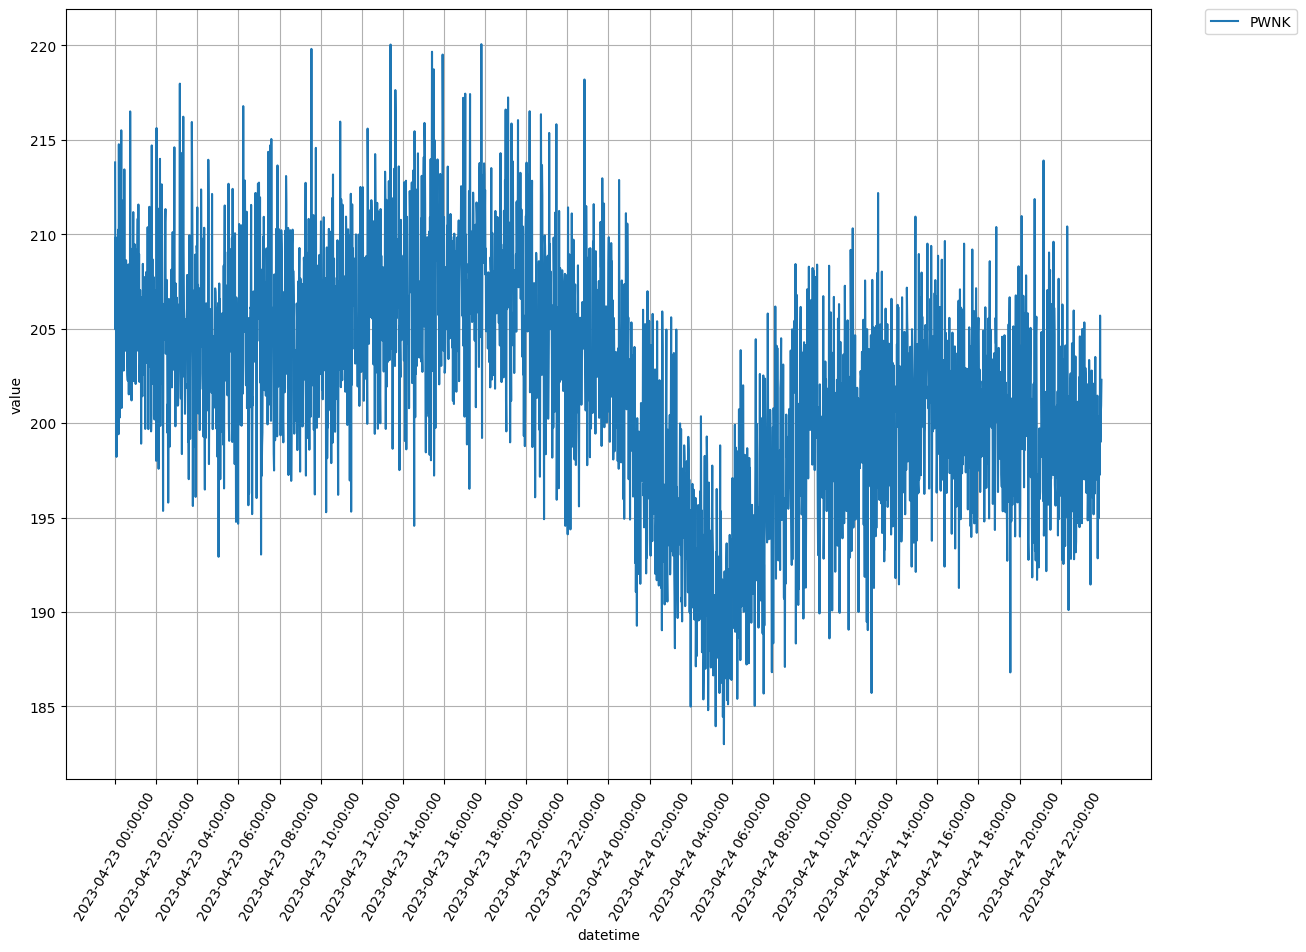

In [45]:
fig, ax = plt.subplots(figsize=(14, 10))

# We can plot all stations at once, but this one it's special,
# it's so clear the Forbush Decrease
sns.lineplot(
    data=df_plot[df_plot["station"] == "PWNK"],
    x="datetime",
    y="value",
    hue="station",
    ax=ax,
)

date_range = pd.date_range(
    start=df_plot["datetime"].min(),
    end=df_plot["datetime"].max(),
    freq="2h",
).to_list()

ax.set_xticks(
    ticks=date_range,
    labels=list(map(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"), date_range)),
)


plt.xticks(rotation=60)
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()